In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, lit, avg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from scipy.stats import chi2_contingency
from imblearn.combine import SMOTEENN

**EDA**

In [0]:
df = spark.table("hive_metastore.default.digital_marketing_campaign_dataset_csv")

In [0]:
display(df.limit(5))

CustomerID Age Gender Income CampaignChannel CampaignType AdSpend ClickThroughRate ConversionRate WebsiteVisits PagesPerVisit TimeOnSite SocialShares EmailOpens EmailClicks PreviousPurchases LoyaltyPoints AdvertisingPlatform AdvertisingTool Conversion 8000 56 Female 136912.0 Social Media Awareness 6497.87 0.04391851 0.08803141 0 2.3990166 7.3968024 19 6 9 4 688 IsConfid ToolConfid true 8001 69 Male 41760.0 Email Retention 3898.6687 0.15572508 0.18272468 42 2.9171379 5.3525486 5 2 7 2 3459 IsConfid ToolConfid true 8002 46 Female 88456.0 PPC Awareness 1546.4296 0.27749038 0.07642272 2 8.223619 13.794902 0 11 2 8 2337 IsConfid ToolConfid true 8003 32 Female 44085.0 PPC Conversion 539.52594 0.13761126 0.08800419 47 4.540939 14.688363 89 2 2 0 2463 IsConfid ToolConfid true 8004 60 Female 83964.0 PPC Conversion 1678.0436 0.2528511 0.109940104 0 2.046847 13.99337 6 6 6 8 4345 IsConfid ToolConfid true

In [0]:
df = df.withColumn('Conversion', col('Conversion').cast('integer'))

display(df.limit(5))

CustomerID Age Gender Income CampaignChannel CampaignType AdSpend ClickThroughRate ConversionRate WebsiteVisits PagesPerVisit TimeOnSite SocialShares EmailOpens EmailClicks PreviousPurchases LoyaltyPoints AdvertisingPlatform AdvertisingTool Conversion 8000 56 Female 136912.0 Social Media Awareness 6497.87 0.04391851 0.08803141 0 2.3990166 7.3968024 19 6 9 4 688 IsConfid ToolConfid 1 8001 69 Male 41760.0 Email Retention 3898.6687 0.15572508 0.18272468 42 2.9171379 5.3525486 5 2 7 2 3459 IsConfid ToolConfid 1 8002 46 Female 88456.0 PPC Awareness 1546.4296 0.27749038 0.07642272 2 8.223619 13.794902 0 11 2 8 2337 IsConfid ToolConfid 1 8003 32 Female 44085.0 PPC Conversion 539.52594 0.13761126 0.08800419 47 4.540939 14.688363 89 2 2 0 2463 IsConfid ToolConfid 1 8004 60 Female 83964.0 PPC Conversion 1678.0436 0.2528511 0.109940104 0 2.046847 13.99337 6 6 6 8 4345 IsConfid ToolConfid 1

In [0]:
display(df[df.Conversion == 0])

CustomerID Age Gender Income CampaignChannel CampaignType AdSpend ClickThroughRate ConversionRate WebsiteVisits PagesPerVisit TimeOnSite SocialShares EmailOpens EmailClicks PreviousPurchases LoyaltyPoints AdvertisingPlatform AdvertisingTool Conversion 8015 41 Female 39192.0 Email Awareness 429.07922 0.07288973 0.095388964 44 6.953695 2.2520394 33 0 1 1 4474 IsConfid ToolConfid 0 8026 29 Male 78618.0 Email Consideration 636.588 0.1335101 0.10482609 8 7.0026484 8.1868305 5 5 5 1 129 IsConfid ToolConfid 0 8043 24 Male 43386.0 SEO Retention 5705.128 0.04968198 0.18555924 21 2.29059 8.5532675 33 5 9 0 913 IsConfid ToolConfid 0 8113 25 Female 67659.0 Referral Conversion 2135.8877 0.041469984 0.053568717 34 2.6925406 3.2341158 72 8 0 0 4643 IsConfid ToolConfid 0 8142 31 Female 78186.0 PPC Retention 1508.76 0.032484643 0.03445993 38 5.526466 7.242591 12 19 0 1 1913 IsConfid ToolConfid 0 8144 18 Female 114472.0 Social Media Consideration 3354.225 0.08819259 0.06857685 40 7.921171 1.7482064 9 14 4 1 318 IsConfid ToolConfid 0 8151 32 Male 30686.0 Email Conversion 3838.7444 0.023618197 0.10057981 23 1.1845213 4.6972933 54 8 2 1 3395 IsConfid ToolConfid 0 8187 47 Male 140703.0 SEO Conversion 3525.569 0.29031584 0.02933997 14 1.4411032 12.787094 70 4 0 3 855 IsConfid ToolConfid 0 8196 30 Female 82878.0 SEO Retention 1110.4049 0.24013944 0.16920376 38 7.6496463 5.112549 39 5 0 0 844 IsConfid ToolConfid 0 8205 50 Male 29047.0 Email Retention 3872.9656 0.032203447 0.040595204 15 8.254186 4.729119 72 9 4 6 155 IsConfid ToolConfid 0 8212 49 Male 54094.0 Social Media Retention 454.6535 0.018119344 0.105330534 30 1.9407954 12.12391 33 18 2 0 2301 IsConfid ToolConfid 0 8249 69 Female 37580.0 Referral Awareness 2836.1702 0.15554832 0.11574421 23 1.9022862 0.58797044 54 5 6 1 156 IsConfid ToolConfid 0 8264 36 Female 83059.0 Referral Retention 2945.4146 0.010860418 0.08049927 6 1.3092079 4.020952 24 18 0 2 916 IsConfid ToolConfid 0 8274 57 Female 67717.0 PPC Consideration 3827.9473 0.08649563 0.12233392 11 1.28104 1.8261367 0 3 4 8 3878 IsConfid ToolConfid 0 8286 59 Female 24333.0 Referral Retention 2649.601 0.08874269 0.09691132 45 7.8917117 2.832677 34 0 2 6 3377 IsConfid ToolConfid 0 8292 69 Male 40195.0 Referral Consideration 811.76385 0.1646978 0.1719712 5 7.1707993 2.6597972 90 16 1 0 4347 IsConfid ToolConfid 0 8296 65 Female 132265.0 Social Media Awareness 692.4872 0.2721977 0.04533753 1 1.0593854 3.4823458 88 11 5 8 2086 IsConfid ToolConfid 0 8303 52 Female 22985.0 Social Media Consideration 3811.7976 0.08342404 0.13843302 13 5.78117 4.0655236 14 3 0 1 297 IsConfid ToolConfid 0 8308 37 Male 53326.0 Email Awareness 2799.6216 0.12109984 0.012951662 43 2.816099 2.9058492 56 11 1 7 3241 IsConfid ToolConfid 0 8309 41 Female 104816.0 Social Media Retention 2162.2837 0.23949586 0.14904244 7 1.6491289 14.458374 16 11 0 0 3649 IsConfid ToolConfid 0 8316 53 Male 107191.0 Social Media Consideration 678.0846 0.09726658 0.19293824 18 3.0220408 0.77824765 98 6 2 2 507 IsConfid ToolConfid 0 8319 37 Male 127158.0 Email Conversion 3787.2712 0.0135268215 0.059054885 27 1.8783079 7.384574 5 2 1 1 4095 IsConfid ToolConfid 0 8320 52 Female 65076.0 PPC Awareness 4238.711 0.06045051 0.053911842 45 2.851955 4.377328 98 2 2 3 4227 IsConfid ToolConfid 0 8344 34 Female 135845.0 PPC Conversion 1796.026 0.07840569 0.15097103 5 9.615659 1.8716378 75 13 2 1 1558 IsConfid ToolConfid 0 8345 50 Male 87782.0 PPC Retention 7229.1 0.020019436 0.019974276 23 2.9337254 12.2678 42 17 1 0 4707 IsConfid ToolConfid 0 8347 29 Female 124957.0 SEO Consideration 1951.7471 0.093416974 0.011117901 4 2.939859 0.5136754 86 11 4 6 854 IsConfid ToolConfid 0 8356 68 Male 127519.0 Referral Conversion 1473.9518 0.073728405 0.104482405 2 2.1194403 13.380649 31 1 1 3 1188 IsConfid ToolConfid 0 8360 51 Male 61559.0 Social Media Consideration 1249.4585 0.16676532 0.028562557 36 1.659848 4.399039 79 8 9 4 998 IsConfid ToolConfid 0 8364 45 Female 42699.0 Social Media Retention 2957.8015 0.093754135 0.131

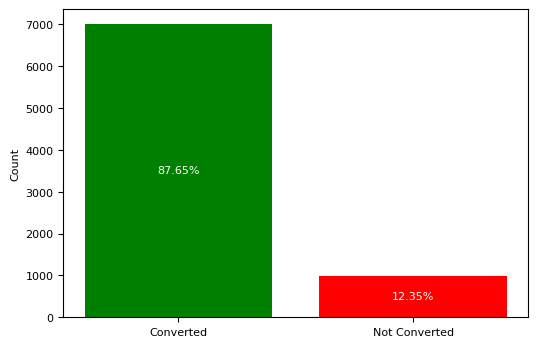

In [0]:
conversion_counts = df.groupBy("Conversion").agg(count(lit(1)).alias("Count"))

# Calculate the total count
total_count = df.count()

# Convert counts to percentages for labeling
conversion_counts = conversion_counts.withColumn("Percentage", (col("Count") / lit(total_count) * 100))

# Convert Spark DataFrame to Pandas DataFrame for visualization
conversion_pd = conversion_counts.toPandas()

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(x=conversion_pd['Conversion'].astype(str), height=conversion_pd['Count'], color=['green', 'red'])

# Adding percentage labels in the middle of bars
for bar, percentage in zip(bars, conversion_pd['Percentage']):
    y_position = bar.get_height() / 2  # Calculate the middle position
    plt.text(bar.get_x() + bar.get_width() / 2, y_position, f'{percentage:.2f}%', ha='center', va='center',color='white')

plt.ylabel('Count')

plt.xticks(ticks=[0, 1], labels=['Converted', 'Not Converted'])
plt.show()

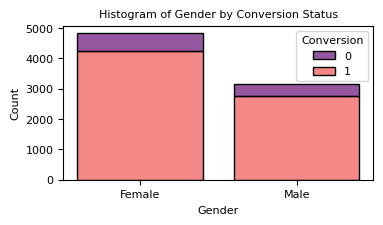

In [0]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4, 2))

# Plotting the histogram using seaborn
sns.histplot(data=df.toPandas(), x='Gender', hue='Conversion', multiple='stack', shrink=0.8,  palette='magma')

# Adding labels and title
plt.xlabel('Gender', fontsize=8)
plt.ylabel('Count', fontsize = 8)
plt.title('Histogram of Gender by Conversion Status', fontsize=8)

# Show the plot
plt.show()

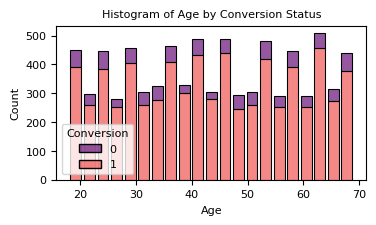

In [0]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4, 2))

# Plotting the histogram using seaborn
sns.histplot(data=df.toPandas(), x='Age', hue='Conversion', multiple='stack', shrink=0.8,  palette='magma')

# Adding labels and title
plt.xlabel('Age', fontsize=8)
plt.ylabel('Count', fontsize = 8)
plt.title('Histogram of Age by Conversion Status', fontsize=8)

# Show the plot
plt.show()

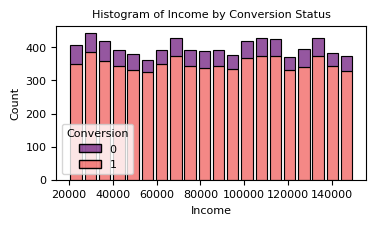

In [0]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4, 2))

# Plotting the histogram using seaborn
sns.histplot(data=df.toPandas(), x='Income', hue='Conversion', multiple='stack', shrink=0.8,  palette='magma')

# Adding labels and title
plt.xlabel('Income', fontsize=8)
plt.ylabel('Count', fontsize = 8)
plt.title('Histogram of Income by Conversion Status', fontsize=8)

# Show the plot
plt.show()

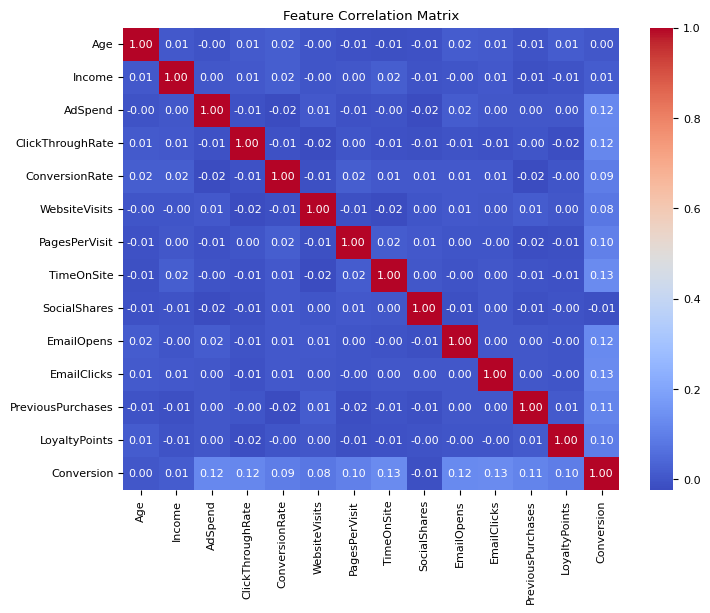

In [0]:
# List of columns you want to include in the correlation matrix
columns_to_include = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints','Conversion']

# Assemble the vector
assembler = VectorAssembler(inputCols=columns_to_include, outputCol="features")
df_vector = assembler.transform(df).select("features")

# Calculate Pearson correlation matrix
corr_matrix = Correlation.corr(df_vector, "features").head()[0].toArray()

# Convert to Pandas DataFrame for plotting
corr_df = pd.DataFrame(corr_matrix, index=columns_to_include, columns=columns_to_include)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

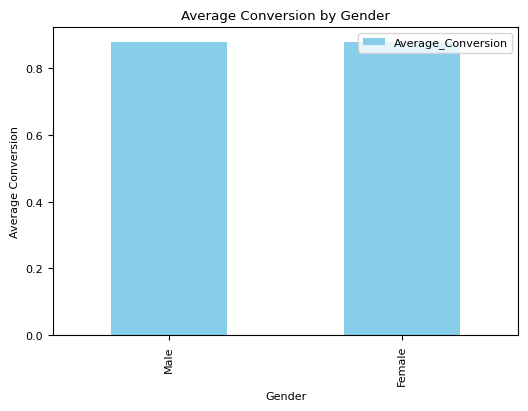

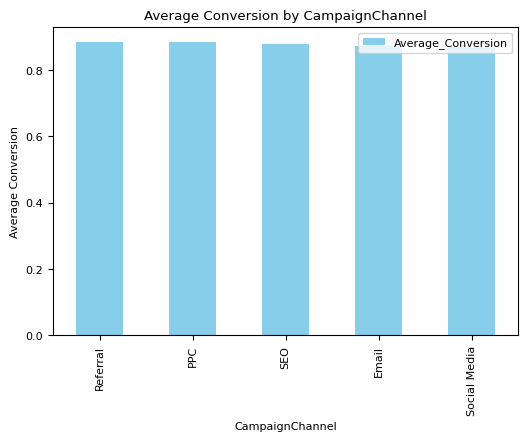

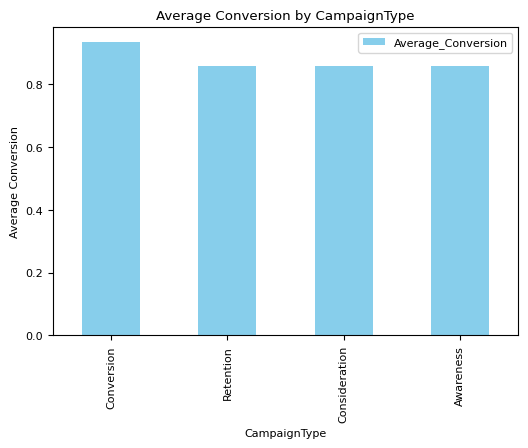

In [0]:

categorical_columns = [item[0] for item in df.dtypes if item[1].startswith('string') and item[0] not in ['CustomerID', 'AdvertisingTool', 'AdvertisingPlatform']]

for column in categorical_columns:
    result_df = df.groupBy(column).agg(avg(col("Conversion")).alias("Average_Conversion")).orderBy("Average_Conversion", ascending=False)
    result_pd = result_df.toPandas()
    result_pd.plot(kind='bar', x=column, y='Average_Conversion', color='skyblue', figsize=(6, 4))
    plt.title(f'Average Conversion by {column}')
    plt.ylabel('Average Conversion')
    plt.xlabel(column)
    display()  # Use display() to show the plot in Databricks

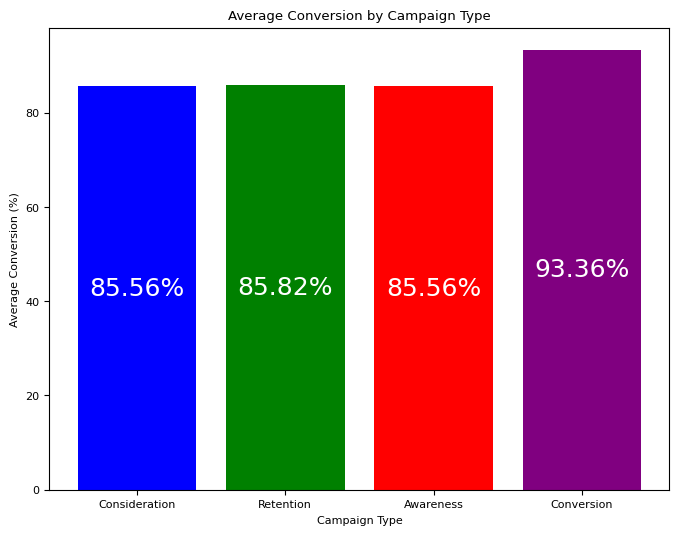

In [0]:

# Calculate average conversion by CampaignType
avg_conversion_df = df.groupBy("CampaignType").agg(avg(col("Conversion")).alias("Average_Conversion"))

# Multiply by 100 to convert to percentage
avg_conversion_df = avg_conversion_df.withColumn("Average_Conversion", col("Average_Conversion") * 100)

# Convert to Pandas for plotting
avg_conversion_pd = avg_conversion_df.toPandas()

# Define a list of colors for the bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']

# Ensure the list of colors is at least as long as the number of unique campaign types
unique_campaign_types = avg_conversion_pd['CampaignType'].nunique()
if len(colors) < unique_campaign_types:
    print("Warning: Not enough colors specified for each campaign type. Some bars will have the same color.")

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(x=avg_conversion_pd['CampaignType'], height=avg_conversion_pd['Average_Conversion'], color=colors)

plt.title('Average Conversion by Campaign Type')
plt.ylabel('Average Conversion (%)')
plt.xlabel('Campaign Type')

# Adding the percentage labels in the middle of the bars, rounded to the nearest hundredth
for bar, value in zip(bars, avg_conversion_pd['Average_Conversion']):
    y_position = bar.get_height() / 2  # Calculate the middle position
    plt.text(bar.get_x() + bar.get_width() / 2, y_position, f'{value:.2f}%', ha='center', va='center', color='white', fontsize=18)

display()  # Use display() to show the plot in Databricks

Feature Selection

In [0]:
target_column = 'Conversion'

In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest


# Indexing categorical columns
indexers = [StringIndexer(inputCol=column, outputCol=column+"_indexed").fit(df) for column in categorical_columns]

# Creating a pipeline to transform the data
pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df).transform(df)

# Assembling indexed columns into a single vector column
assembler = VectorAssembler(inputCols=[column+"_indexed" for column in categorical_columns], outputCol="features")
df_assembled = assembler.transform(df_indexed)

# Performing Chi-Squared test
r = ChiSquareTest.test(df_assembled, "features", target_column).head()

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

pValues: [0.9233881873083927,0.5944499903760994,0.0]
degreesOfFreedom: [1, 4, 3]
statistics: [0.009248031875412217,2.784854064362406,84.45439577326071]


In [0]:
# Assuming 'r' contains the results from the ChiSquareTest
pValues = r.pValues
cat_features_passed = []

# Assuming 'categorical_columns' contains the names of your categorical features
for i, p_value in enumerate(pValues):
    if p_value <= 0.05:
        cat_features_passed.append(categorical_columns[i])

# Display the features that passed the Chi-Squared test
print("Features that passed the Chi-Squared test:", cat_features_passed)

Features that passed the Chi-Squared test: ['CampaignType']


In [0]:
numerical_columns = [item[0] for item in df.dtypes if item[1] in ('int', 'double', 'float') and item[0] not in ['CustomerID','Conversion']]

In [0]:
from scipy.stats import kruskal

# Assuming 'df' is your Spark DataFrame and 'numerical_columns' is a list of your numerical feature names
# Also assuming 'target_column' is the name of your categorical target variable

# Convert Spark DataFrame to Pandas DataFrame for the analysis
pdf = df.select(numerical_columns + [target_column]).toPandas()

# Perform Kruskal-Wallis test for each numerical feature against the target
for column in numerical_columns:
    # Prepare data for the test
    groups = pdf.groupby(target_column)[column].apply(list)
    # Perform the Kruskal-Wallis test
    stat, p = kruskal(*groups)
    
    # Check if the p-value is less than or equal to 0.05
    if p <= 0.05:
        num_features_passed.append(column)

Numerical columns that passed the Kruskal-Wallis test: ['AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']


Modelling

In [0]:
model_df = df.drop("CustomerID", "AdvertisingPlatform", "AdvertisingTool")

In [0]:
train_df, test_df = model_df.randomSplit([0.99, 0.01], seed=42)
display(train_df)

Age Gender Income CampaignChannel CampaignType AdSpend ClickThroughRate ConversionRate WebsiteVisits PagesPerVisit TimeOnSite SocialShares EmailOpens EmailClicks PreviousPurchases LoyaltyPoints Conversion 18 Female 20079.0 SEO Consideration 951.5801 0.07215257 0.12221146 24 8.407399 10.306033 39 6 8 4 687 1 18 Female 23722.0 SEO Conversion 340.26852 0.08915515 0.17158714 21 4.6433454 11.012467 29 7 7 2 3394 1 18 Female 24321.0 Email Conversion 4254.0312 0.26772055 0.1120827 11 5.5784926 13.613536 51 1 3 1 3160 1 18 Female 27089.0 SEO Consideration 5498.511 0.08926267 0.12743212 29 3.526482 4.8718305 12 3 5 8 2936 0 18 Female 28678.0 Social Media Conversion 5285.584 0.06600009 0.14314045 38 9.153895 12.184929 15 19 2 8 4065 0 18 Female 32018.0 PPC Awareness 3360.4456 0.115913436 0.14789546 38 8.338081 4.610351 25 10 3 7 3851 1 18 Female 36151.0 Email Conversion 304.15582 0.2529383 0.1540094 46 5.4587393 8.998876 10 10 6 3 719 1 18 Female 36411.0 Referral Consideration 7080.0967 0.2036195 0.07750897 38 2.71155 0.9936512 24 4 5 1 2467 1 18 Female 36945.0 Social Media Awareness 8235.909 0.21359254 0.18232602 49 1.6793084 3.411431 81 15 7 1 3732 1 18 Female 37658.0 Email Consideration 4738.3296 0.1112193 0.12066687 37 9.91676 13.990779 73 7 4 2 4824 0 18 Female 42966.0 SEO Consideration 1801.6887 0.11318825 0.030569103 45 3.0730925 11.230606 36 4 4 3 4981 1 18 Female 43233.0 PPC Awareness 7932.7676 0.13501151 0.04380526 46 7.83292 6.1674447 83 15 5 5 1148 1 18 Female 44256.0 Referral Conversion 7874.174 0.18304847 0.060535073 31 1.5636182 9.920615 31 5 3 0 687 1 18 Female 44507.0 SEO Consideration 7464.038 0.25568864 0.157271 10 2.3033922 8.630518 53 8 1 3 3605 1 18 Female 45437.0 Email Retention 9213.178 0.20331596 0.12762815 48 5.8854895 7.084078 32 12 1 3 1768 1 18 Female 46082.0 Social Media Awareness 4829.1655 0.22071785 0.18423489 26 5.967018 12.002201 3 4 5 1 1948 1 18 Female 48134.0 PPC Consideration 7239.6265 0.2815907 0.17805459 30 2.3711524 3.1158202 88 14 6 5 1086 0 18 Female 52333.0 PPC Awareness 1534.7234 0.20816638 0.15720938 47 1.7347528 2.5756764 44 16 2 6 3699 1 18 Female 54528.0 Referral Conversion 1162.1804 0.11145542 0.10641442 2 9.515129 7.7358246 7 5 8 3 933 1 18 Female 59113.0 Referral Awareness 4411.2134 0.13564262 0.18139942 7 6.175367 6.997915 28 15 8 3 3814 1 18 Female 59720.0 Referral Conversion 6853.333 0.05680683 0.13130172 14 7.112431 12.369762 40 8 4 8 925 1 18 Female 61319.0 Referral Consideration 4633.837 0.1382593 0.19222997 28 8.522298 11.130448 94 5 2 0 1349 1 18 Female 62721.0 SEO Consideration 502.87823 0.022585405 0.106602155 22 1.3515545 11.911826 72 0 5 7 3737 1 18 Female 65099.0 Referral Retention 218.42528 0.28451878 0.027701909 24 9.810023 0.8420568 79 15 3 3 3529 1 18 Female 65217.0 Email Retention 7147.3174 0.10349305 0.055479325 10 7.8167834 1.4614522 2 1 0 3 1034 1 18 Female 66125.0 PPC Awareness 3361.6892 0.21467629 0.05935448 39 9.87016 8.792592 30 0 1 7 2842 1 18 Female 68122.0 Social Media Awareness 6447.5107 0.10893215 0.09507111 38 6.0507064 2.6851866 11 2 2 7 326 1 18 Female 68263.0 Email Conversion 9038.837 0.039043363 0.030482028 5 6.6453357 13.925412 89 7 7 2 1117 1 18 Female 69741.0 PPC Conversion 8043.304 0.26340866 0.030075561 9 3.98759 8.5261545 11 4 6 5 4141 1 18 Female 70790.0 Email Awareness 3198.373 0.19718266 0.02335207 42 6.8434024 1.9969828 77 12 0 5 2441 1 18 Female 71857.0 SEO Awareness 6069.9062 0.22102089 0.14090858 43 4.392871 13.365527 30 4 1 1 4383 1 18 Female 71885.0 SEO Retention 8565.431 0.021535967 0.0769401 41 9.722682 9.349287 36 15 2 9 3603 1 18 Female 73642.0 PPC Conversion 1320.6812 0.22636685 0.19531532 12 8.713766 12.990278 49 5 8 9 2207 1 18 Female 73986.0 Email Conversion 2259.852 0.047042653 0.01570021 38 4.534336 8.928345 1 9 9 5 4921 1 18 Female 74820.0 Email Consideration 170.56227 0.24069506 0.044123102 13 6.133485 1.6620244 42 15 1 3 837 0 18 Female 75313.0 Social Media Consideration 9251.297 0.13907859 0.117895134 19 8.862056 12.634739

In [0]:
from databricks import automl
summary = automl.classify(train_df, target_col="Conversion", timeout_minutes=30)

2024/08/14 16:40:26 INFO databricks.automl.client.manager: AutoML will optimize for F1 score metric, which is tracked as val_f1_score in the MLflow experiment.
2024/08/14 16:40:27 INFO databricks.automl.client.manager: MLflow Experiment ID: 363340752390845
2024/08/14 16:40:27 INFO databricks.automl.client.manager: MLflow Experiment: https://uchicago-team7-databricks.cloud.databricks.com/?o=2559582108114497#mlflow/experiments/363340752390845
2024/08/14 16:42:47 INFO databricks.automl.client.manager: Data exploration notebook: https://uchicago-team7-databricks.cloud.databricks.com/?o=2559582108114497#notebook/363340752390863
2024/08/14 17:11:17 INFO databricks.automl.client.manager: AutoML experiment completed successfully.


For exploratory data analysis, open the data exploration notebook 
 To view the best performing model, open the best trial notebook 
 To view details about all trials, navigate to the MLflow experiment 
 Metrics for the best trial: 
 
 <!-- class inlined from https://github.com/databricks/universe/blob/feaafc3875d9b95a124ed44ff4b99fb1002e544d/webapp/web/js/templates/iframeSandbox.css#L35 -->
 
 
 
 
 
 Train 
 Validation 
 Test 
 
 
 
 
 
 f1_score 
 0.968 
 0.949 
 0.953 
 
 

 
 recall_score 
 0.997 
 0.996 
 0.996 
 
 

 
 roc_auc 
 0.889 
 0.807 
 0.837 
 
 

 
 false_negatives 
 11.000 
 5.000 
 5.000 
 
 

 
 false_positives 
 266.000 
 146.000 
 130.000 
 
 

 
 example_count 
 4703.000 
 1638.000 
 1579.000 
 
 

 
 precision_score 
 0.939 
 0.906 
 0.914 
 
 

 
 true_positives 
 4125.000 
 1415.000 
 1378.000 
 
 

 
 precision_recall_auc 
 0.976 
 0.946 
 0.954 
 
 

 
 true_negatives 
 301.000 
 72.000 
 66.000 
 
 

 
 log_loss 
 0.208 
 0.290 
 0.260 
 
 

 
 score 
 0.941 
 0.908 
 0.915 
 
 

 
 accuracy_score 
 0.941 
 0.908 
 0.915

In [0]:
summary.best_trial

In [0]:
model_uri = summary.best_trial.model_path

In [0]:
model_uri

'dbfs:/databricks/mlflow-tracking/363340752390845/039a2debf5f14d8984c8f9e19adfd998/artifacts/model'

In [0]:
import mlflow

# Prepare test dataset
test_pdf = test_df.toPandas()
y_test = test_pdf["Conversion"]
X_test = test_pdf.drop("Conversion", axis=1)

# Run inference using the best model
model = mlflow.pyfunc.load_model(model_uri)
predictions = model.predict(X_test)
test_pdf["conversion_predicted"] = predictions
display(test_pdf)

[LightGBM] [Warning] lambda_l2 is set=11.560017805648627, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11.560017805648627
[LightGBM] [Warning] lambda_l1 is set=0.2892876799108943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2892876799108943


Age Gender Income CampaignChannel CampaignType AdSpend ClickThroughRate ConversionRate WebsiteVisits PagesPerVisit TimeOnSite SocialShares EmailOpens EmailClicks PreviousPurchases LoyaltyPoints Conversion conversion_predicted 18 Female 34601.0 Referral Awareness 8142.9995 0.10048479 0.06958784 27 4.365491 1.5964768 75 2 8 4 1544 1 1 18 Female 90990.0 Social Media Retention 4015.3264 0.16793752 0.18962261 39 4.20208 10.778496 71 15 8 4 2721 1 1 19 Female 130728.0 PPC Awareness 8438.514 0.11020566 0.14753139 24 3.6582243 14.92569 19 7 8 2 1635 1 1 19 Male 75696.0 PPC Retention 9570.955 0.25299302 0.17136739 32 3.8797174 14.422801 41 10 8 8 926 1 1 19 Male 131713.0 PPC Awareness 9937.331 0.15500735 0.19703609 38 3.5359235 4.1729007 39 7 5 8 1669 1 1 20 Female 32939.0 Email Consideration 9440.705 0.0723223 0.13392985 48 7.9281116 5.799964 73 10 7 9 2070 1 1 22 Female 105823.0 PPC Consideration 225.30203 0.050905418 0.15292813 27 8.293731 10.020503 43 0 7 9 4579 1 1 22 Male 80436.0 SEO Awareness 3389.2578 0.11753232 0.034261197 18 4.304178 5.381598 31 10 4 1 346 1 1 23 Female 75413.0 SEO Awareness 4317.998 0.13025689 0.038844656 45 8.622139 9.535927 79 2 1 6 3793 1 1 23 Male 110577.0 Social Media Consideration 3401.3386 0.23801926 0.12713464 27 4.6260805 12.030522 81 13 1 6 4807 0 1 25 Female 109856.0 SEO Consideration 5038.6006 0.14107002 0.18298408 16 4.689992 1.6903031 76 5 0 5 4106 1 1 25 Male 129122.0 Social Media Consideration 6979.075 0.0739227 0.0994176 16 6.2434583 10.673453 59 10 6 5 928 1 1 26 Female 103449.0 PPC Retention 2162.5894 0.17552452 0.072599165 2 8.602889 7.955141 10 12 2 5 4735 1 1 29 Male 36464.0 SEO Conversion 285.04276 0.11401274 0.10472803 32 9.189011 5.6123104 69 7 5 9 780 1 1 32 Female 82146.0 Social Media Conversion 6346.839 0.059859417 0.098904945 42 4.237669 0.5493895 6 18 8 1 3756 1 1 33 Male 60131.0 Social Media Conversion 5897.8984 0.04155503 0.04608714 45 2.736607 5.9250903 15 13 0 3 3597 0 1 34 Female 36167.0 PPC Consideration 489.82764 0.013079577 0.051262233 49 5.5877643 2.7617688 11 19 1 5 1076 1 1 34 Female 76435.0 PPC Retention 347.21313 0.2776034 0.017277997 41 4.005645 9.517325 23 12 8 3 4469 1 1 34 Male 116993.0 Email Consideration 1896.2544 0.08674133 0.17467263 30 5.344989 13.418561 16 17 8 2 3767 1 1 36 Female 77352.0 SEO Conversion 2441.5303 0.10434246 0.123158336 34 3.556882 5.7196374 31 1 5 4 3112 1 1 37 Male 57479.0 Email Consideration 5771.6787 0.17808297 0.13331443 35 3.8959103 4.3892336 97 12 6 8 820 1 1 37 Male 107049.0 SEO Awareness 5092.9165 0.28796294 0.010458614 34 6.065807 0.501684 0 9 6 7 1066 1 1 38 Female 102245.0 Referral Conversion 753.3604 0.14722753 0.16209115 6 8.354954 14.219467 10 16 1 4 1610 1 1 40 Female 39322.0 SEO Awareness 1430.6206 0.17382614 0.05858017 33 6.19567 10.856207 19 8 5 0 1775 1 1 40 Female 53937.0 Referral Awareness 9181.605 0.0122304 0.16774008 35 1.840511 11.803628 39 15 4 6 3372 1 1 40 Female 81717.0 Social Media Retention 6438.165 0.074825846 0.11764126 43 5.876504 14.526407 96 10 6 0 1803 1 1 40 Female 128819.0 SEO Awareness 121.38503 0.19539122 0.04445799 31 2.8367527 6.5087004 99 19 4 3 4649 1 1 41 Female 93285.0 SEO Consideration 7162.7397 0.09939572 0.04343216 25 8.219863 5.5046234 21 1 6 6 769 1 1 41 Female 107399.0 Social Media Conversion 3165.8271 0.18733615 0.098923214 0 2.431816 13.644225 40 7 3 3 613 1 1 42 Female 114769.0 Referral Conversion 1572.4698 0.07580049 0.16478862 17 6.156617 5.052443 64 13 7 8 1165 1 1 42 Female 127955.0 SEO Retention 408.69055 0.2006428 0.108171426 46 6.915495 13.974394 96 17 4 9 3404 1 1 42 Male 140695.0 Referral Awareness 6635.743 0.21161857 0.15401055 5 8.665708 1.7438182 61 16 7 3 4717 1 1 43 Female 113445.0 Referral Consideration 6011.7095 0.1765395 0.026917916 46 2.8797152 2.1144173 65 14 0 9 1076 1 1 43 Female 132343.0 PPC Consideration 6580.747 0.1412511 0.035593785 37 1.4368205 14.393437 70 16 0 1 2428 1 1 43 Male 48281.0 Social Media Retention 1115.4672 0.28372106 0.08274219 12 7.591352 8.24

In [0]:
model_name = "AutoML - Heidi"
registered_model_version = mlflow.register_model(model_uri, model_name)

Successfully registered model 'AutoML - Heidi'.
Created version '1' of model 'AutoML - Heidi'.


Adjusted Model

In [0]:
from databricks.automl_runtime.sklearn.column_selector import ColumnSelector
supported_cols = cat_features_passed + num_features_passed
col_selector = ColumnSelector(supported_cols)

Numerical Data processing

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

num_imputers = []
num_imputers.append(("impute_mean", SimpleImputer(), num_features_passed))

numerical_pipeline = Pipeline(steps=[
    ("converter", FunctionTransformer(lambda df: df.apply(pd.to_numeric, errors='coerce'))),
    ("imputers", ColumnTransformer(num_imputers)),
    ("standardizer", StandardScaler()),
])

numerical_transformers = [("numerical", numerical_pipeline, num_features_passed)]

Categorical columns preprocessing

In [0]:
from databricks.automl_runtime.sklearn import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

one_hot_imputers = []

one_hot_pipeline = Pipeline(steps=[
    ("imputers", ColumnTransformer(one_hot_imputers, remainder="passthrough")),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="indicator")),
])

categorical_one_hot_transformers = [("onehot", one_hot_pipeline, cat_features_passed)]

In [0]:
from sklearn.compose import ColumnTransformer

transformers = numerical_transformers + categorical_one_hot_transformers

preprocessor = ColumnTransformer(transformers, remainder="passthrough", sparse_threshold=0)

Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
# Splitting the data into features (X) and target variable (y)
X = pandas_df.drop(target_column, axis=1)
y = pandas_df[target_column]

# Splitting the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 1

In [0]:
import lightgbm
from lightgbm import LGBMClassifier

In [0]:
import mlflow
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# Define your pipeline
pipeline = Pipeline([
    ("column_selector", col_selector),
    ("preprocessor", preprocessor),
    ("classifier", LGBMClassifier()),
])

param_dist = {
    'classifier__colsample_bytree': [0.5, 0.75, 1.0],
    'classifier__lambda_l1': np.linspace(0, 10, 10),
    'classifier__lambda_l2': np.linspace(0, 10, 10),
    'classifier__learning_rate': np.linspace(0.01, 0.3, 10),
    'classifier__max_depth': list(range(3, 25)),
    'classifier__min_child_samples': list(range(5, 101, 5)),
    'classifier__n_estimators': [100, 200, 300, 400, 500, 1000],
    'classifier__num_leaves': [31, 63, 127, 255],
    'classifier__subsample': np.linspace(0.6, 1.0, 10)
}

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring=make_scorer(f1_score),  # Can be adjusted based on your needs
    cv=5,  # Number of folds in cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Number of jobs to run in parallel
)

with mlflow.start_run():
    # Fit the RandomizedSearchCV object to the training data
    random_search.fit(X_train, y_train)
    # Predictions for test set
    y_pred = random_search.predict(X_test)
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    # Calculate test ROC AUC
    test_roc_auc = roc_auc_score(y_test, random_search.predict_proba(X_test)[:, 1])
    # Log the test, validation, and training scores
    mlflow.log_metric("test_f1_score", random_search.score(X_test, y_test))
    mlflow.log_metric("val_f1_score", random_search.best_score_)
    mlflow.log_metric("training_f1_score", random_search.score(X_train, y_train))
    # Log additional metrics
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_roc_auc", test_roc_auc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] lambda_l2 is set=8.88888888888889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.88888888888889
[LightGBM] [Warning] lambda_l1 is set=5.555555555555555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.555555555555555
[LightGBM] [Warning] lambda_l2 is set=8.88888888888889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.88888888888889
[LightGBM] [Warning] lambda_l1 is set=5.555555555555555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.555555555555555


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

[LightGBM] [Warning] lambda_l2 is set=8.88888888888889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.88888888888889
[LightGBM] [Warning] lambda_l1 is set=5.555555555555555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.555555555555555
[LightGBM] [Warning] lambda_l2 is set=8.88888888888889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.88888888888889
[LightGBM] [Warning] lambda_l1 is set=5.555555555555555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.555555555555555
[LightGBM] [Warning] lambda_l2 is set=8.88888888888889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.88888888888889
[LightGBM] [Warning] lambda_l1 is set=5.555555555555555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.555555555555555
[LightGBM] [Warning] lambda_l2 is set=8.88888888888889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.88888888888889
[LightGBM] [Warning] lambda_l1 is set=5.555555555555555, reg_alpha=0.0 will be ignored.

In [0]:
pipeline

Pipeline(steps=[('column_selector',
                 ColumnSelector(cols=['CampaignType', 'AdSpend',
                                      'ClickThroughRate', 'ConversionRate',
                                      'WebsiteVisits', 'PagesPerVisit',
                                      'TimeOnSite', 'EmailOpens', 'EmailClicks',
                                      'PreviousPurchases', 'LoyaltyPoints'])),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('...
                                                                   StandardScaler())]),
                                                  ['AdSpend',
                                                   'ClickThroughRate',
                                                   'ConversionRate',
                                                   'WebsiteVisits',
                                                   'PagesPerVisit',
                                                   'TimeOnSite', 'EmailOpens',
                                                   'EmailClicks',
                                                   'PreviousPurchases',
                                                   'LoyaltyPoints']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputers',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[])),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['CampaignType'])])),
                ('classifier', LGBMClassifier())])

Model 2

In [0]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from lightgbm import LGBMClassifier
import numpy as np
import mlflow

mlflow.sklearn.autolog()
# Assuming col_selector and preprocessor are defined earlier in your code

# Define your pipeline with SMOTEENN
pipeline = ImbPipeline([
    ("column_selector", col_selector),
    ("preprocessor", preprocessor),
    ("smoteenn", SMOTEENN(random_state=42)),
    ("classifier", LGBMClassifier()),
])

param_dist = {
    'classifier__colsample_bytree': [0.5, 0.75, 1.0],
    'classifier__lambda_l1': np.linspace(0, 10, 10),
    'classifier__lambda_l2': np.linspace(0, 10, 10),
    'classifier__learning_rate': np.linspace(0.01, 0.3, 10),
    'classifier__max_depth': list(range(3, 25)),
    'classifier__min_child_samples': list(range(5, 101, 5)),
    'classifier__n_estimators': [100, 200, 300, 400, 500, 1000],
    'classifier__num_leaves': [31, 63, 127, 255],
    'classifier__subsample': np.linspace(0.6, 1.0, 10)
}

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring=make_scorer(f1_score),  # Can be adjusted based on your needs
    cv=5,  # Number of folds in cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Number of jobs to run in parallel
)

with mlflow.start_run():
    # Fit the RandomizedSearchCV object to the training data
    random_search.fit(X_train, y_train)
    # Predictions for test set
    y_pred = random_search.predict(X_test)
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    # Calculate test ROC AUC
    test_roc_auc = roc_auc_score(y_test, random_search.predict_proba(X_test)[:, 1])
    # Log the test, validation, and training scores
    mlflow.log_metric("test_f1_score", random_search.score(X_test, y_test))
    mlflow.log_metric("val_f1_score", random_search.best_score_)
    mlflow.log_metric("training_f1_score", random_search.score(X_train, y_train))
    # Log additional metrics
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_roc_auc", test_roc_auc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] lambda_l2 is set=3.3333333333333335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3333333333333335
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set=3.3333333333333335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3333333333333335
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

[LightGBM] [Warning] lambda_l2 is set=3.3333333333333335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3333333333333335
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set=3.3333333333333335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3333333333333335
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set=3.3333333333333335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3333333333333335
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Accuracy

In [0]:
X_train

CustomerID  Age  Gender  ...  LoyaltyPoints AdvertisingPlatform AdvertisingTool
7339      15339   22  Female  ...           1421            IsConfid      ToolConfid
629        8629   66  Female  ...           2820            IsConfid      ToolConfid
955        8955   66    Male  ...            187            IsConfid      ToolConfid
2151      10151   29  Female  ...           3595            IsConfid      ToolConfid
1316       9316   19    Male  ...           1758            IsConfid      ToolConfid
...         ...  ...     ...  ...            ...                 ...             ...
6140      14140   62  Female  ...           2475            IsConfid      ToolConfid
4170      12170   27  Female  ...           1135            IsConfid      ToolConfid
1761       9761   26    Male  ...           2136            IsConfid      ToolConfid
1252       9252   23  Female  ...           3094            IsConfid      ToolConfid
2155      10155   48    Male  ...           3433            IsConfid      ToolConfid

[4800 rows x 19 columns]

In [0]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
# Convert transformed data back to DataFrame to leverage .to_csv method
import pandas as pd

# Assuming preprocessor does not change the order of rows
# And you do not have the new column names

# For X_train_transformed
num_columns = X_train_transformed.shape[1]  # Get the number of columns after transformation
X_train_transformed_df = pd.DataFrame(X_train_transformed, 
                                      columns=[f'feature_{i}' for i in range(num_columns)])

# For X_test_transformed
num_columns = X_test_transformed.shape[1]  # Get the number of columns after transformation
X_test_transformed_df = pd.DataFrame(X_test_transformed, 
                                     columns=[f'feature_{i}' for i in range(num_columns)])

In [0]:
X_train_transformed_df 

feature_0  feature_1  feature_2  ...  feature_11  feature_12  feature_13
0      1.092059  -1.134331  -1.538593  ...         0.0         0.0         0.0
1     -0.124315  -0.101067  -1.312991  ...         1.0         0.0         0.0
2      0.900095  -1.224587  -1.346301  ...         0.0         1.0         0.0
3      1.052937   0.476006   1.000026  ...         0.0         1.0         0.0
4      0.028922  -0.784295   1.316319  ...         1.0         0.0         0.0
...         ...        ...        ...  ...         ...         ...         ...
4795  -1.645332  -1.223950   1.456128  ...         1.0         0.0         0.0
4796  -1.151982  -0.985720  -0.710361  ...         0.0         0.0         0.0
4797   1.226101   0.464815  -0.585593  ...         0.0         0.0         0.0
4798   1.096667  -1.401734   1.000933  ...         0.0         0.0         0.0
4799   0.289110  -0.247577  -0.854555  ...         0.0         1.0         0.0

[4800 rows x 14 columns]

In [0]:
X_train

CustomerID  Age  Gender  ...  LoyaltyPoints AdvertisingPlatform AdvertisingTool
7339      15339   22  Female  ...           1421            IsConfid      ToolConfid
629        8629   66  Female  ...           2820            IsConfid      ToolConfid
955        8955   66    Male  ...            187            IsConfid      ToolConfid
2151      10151   29  Female  ...           3595            IsConfid      ToolConfid
1316       9316   19    Male  ...           1758            IsConfid      ToolConfid
...         ...  ...     ...  ...            ...                 ...             ...
6140      14140   62  Female  ...           2475            IsConfid      ToolConfid
4170      12170   27  Female  ...           1135            IsConfid      ToolConfid
1761       9761   26    Male  ...           2136            IsConfid      ToolConfid
1252       9252   23  Female  ...           3094            IsConfid      ToolConfid
2155      10155   48    Male  ...           3433            IsConfid      ToolConfid

[4800 rows x 19 columns]

Model 1

[LightGBM] [Warning] lambda_l2 is set=8.88888888888889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.88888888888889
[LightGBM] [Warning] lambda_l1 is set=5.555555555555555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.555555555555555


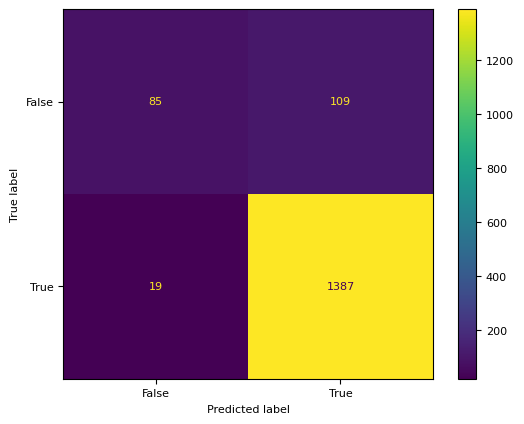

In [0]:
# Load the best model from the first MLflow experiment
best_model_uri = mlflow.search_runs(order_by=["metrics.test_f1_score DESC"]).iloc[0]["artifact_uri"] + "/model"
best_model = mlflow.sklearn.load_model(best_model_uri)

# Use the best model to predict
y_pred_best_model = best_model.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_model)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
cmd.plot()

Model 2

[LightGBM] [Warning] lambda_l2 is set=3.3333333333333335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3333333333333335
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


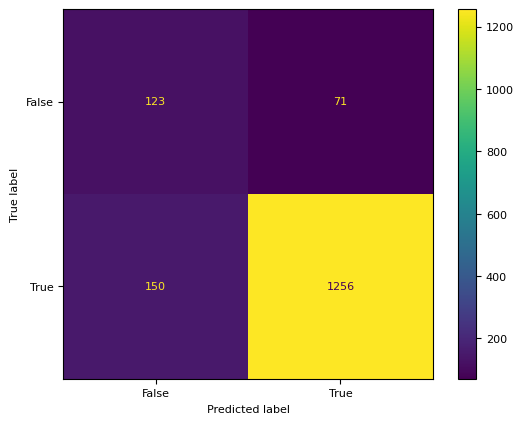

In [0]:
run_id = "5b40e1a4c7944d848e9e4b5948805ac5"
model_uri = f"runs:/{run_id}/model"

# Load the model
model = mlflow.pyfunc.load_model(model_uri)

# Assuming 'X_test' is your features dataset ready for prediction
predictions = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
cmd.plot()

AutoML Model

[LightGBM] [Warning] lambda_l2 is set=11.560017805648627, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11.560017805648627
[LightGBM] [Warning] lambda_l1 is set=0.2892876799108943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2892876799108943


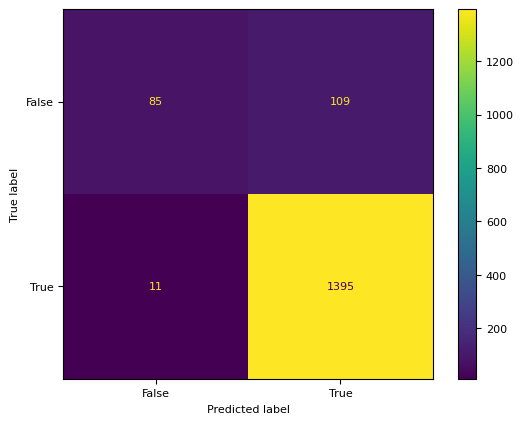

In [0]:
run_id = "039a2debf5f14d8984c8f9e19adfd998"
model_uri = f"runs:/{run_id}/model"

# Load the model
model = mlflow.pyfunc.load_model(model_uri)

# Assuming 'X_test' is your features dataset ready for prediction
predictions = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
cmd.plot()

In [0]:
df.selectExpr("mean(AdSpend)").show()

+-----------------+
|    mean(AdSpend)|
+-----------------+
|5000.944830903053|
+-----------------+

